# 1. Signal Processing for Dementia Patients

Signal processing helps analyze brain activity, speech patterns, and physiological signals in dementia patients. Key applications include:

## EEG Analysis: Detecting abnormal brain activity.
## Speech Processing: Identifying cognitive decline through voice changes.
## Gait and Movement Analysis: Tracking walking patterns to assess motor function.

#### EEG Signal Processing for Dementia
EEG (Electroencephalography) is used to monitor brain activity. Dementia patients often show altered alpha and beta waves. Below is a simple Python example to filter EEG signals and visualize frequency components.

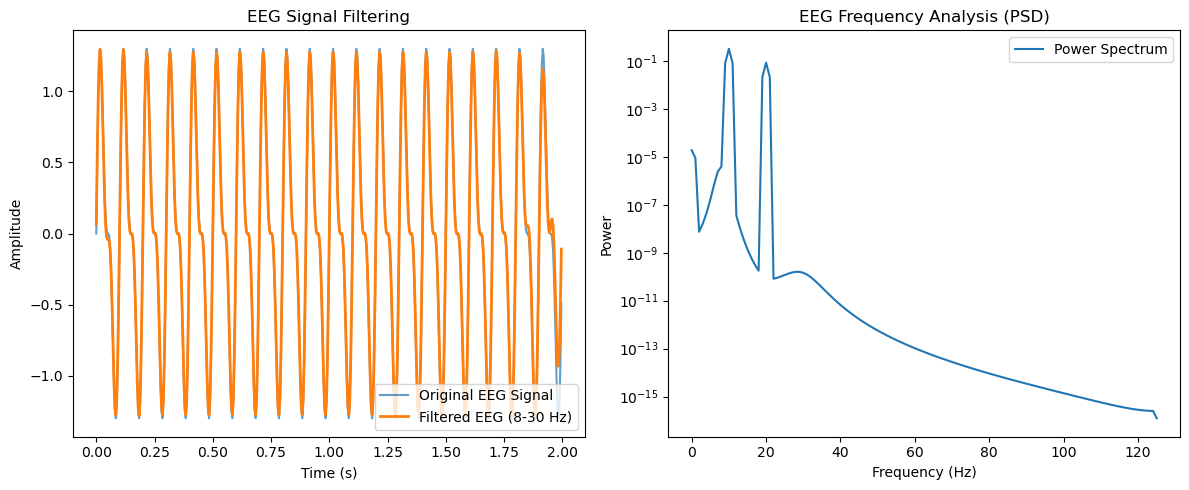

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch

# Generate a synthetic EEG signal (Simulating brain waves)
fs = 250  # Sampling frequency (Hz)
t = np.linspace(0, 2, 2 * fs, endpoint=False)  # 2 seconds of data
signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)  # Simulated alpha + beta waves

# Apply a bandpass filter (keeping 8-30 Hz for dementia-related analysis)
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low, high = lowcut / nyquist, highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

filtered_signal = bandpass_filter(signal, 8, 30, fs)

# Compute Power Spectral Density (PSD) using Welch's method
freqs, psd = welch(filtered_signal, fs, nperseg=fs)

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, signal, label="Original EEG Signal", alpha=0.7)
plt.plot(t, filtered_signal, label="Filtered EEG (8-30 Hz)", linewidth=2)
plt.title("EEG Signal Filtering")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogy(freqs, psd, label="Power Spectrum")
plt.title("EEG Frequency Analysis (PSD)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()

plt.tight_layout()
plt.show()


Simulates brain waves combining alpha (10 Hz) and beta (20 Hz) bands.
Bandpass filter (8-30 Hz) isolates dementia-relevant frequencies.
Power Spectral Density (PSD) shows dominant frequencies in brain activity.

Application in Dementia:
EEG frequency shifts (e.g., reduced alpha waves) can indicate Alzheimer's or cognitive decline.

# 2. Biomechanics for Dementia Patients
Biomechanics helps assess movement disorders in dementia, particularly gait analysis (walking patterns) and motor function. Patients with dementia often show:

## Reduced walking speed
## Shorter step lengths
## Irregular movements

#### Gait Analysis Using Motion Capture Data

Motion sensors or depth cameras (e.g., Kinect, IMU sensors) can track patient movement.

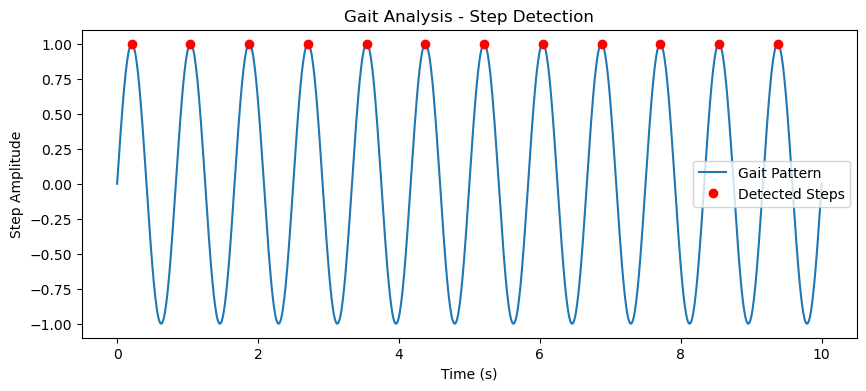

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Simulated gait cycle (step pattern) data
time = np.linspace(0, 10, 1000)  # 10 seconds of data
gait_signal = np.sin(2 * np.pi * 1.2 * time)  # Simulated walking pattern with 1.2 Hz step frequency

# Detect step peaks (local maxima)
peaks, _ = find_peaks(gait_signal, height=0.5, distance=50)

# Plot gait cycle with detected steps
plt.figure(figsize=(10, 4))
plt.plot(time, gait_signal, label="Gait Pattern")
plt.plot(time[peaks], gait_signal[peaks], "ro", label="Detected Steps")
plt.title("Gait Analysis - Step Detection")
plt.xlabel("Time (s)")
plt.ylabel("Step Amplitude")
plt.legend()
plt.show()

## Understanding Gait Analysis for Dementia Using Signal Processing
Gait analysis is a key biomechanical tool to assess mobility impairments in dementia patients. It helps detect shuffling gait, slow walking speed, and irregular step patterns, which are common in conditions like Alzheimer’s and Parkinson’s disease.

## How Gait is Analyzed?
Tracking Movement: Sensors (e.g., IMUs, pressure mats, cameras) capture walking patterns.
    
Step Detection: Identifying foot contact points (heel strike and toe-off).

Analyzing Step Intervals: Measuring time between steps to detect irregularities.
    
Feature Extraction: Calculating step length, cadence (steps per minute), and symmetry.

## 1️⃣ Simple Gait Signal Simulation and Step Detection

Before working with real patient data, let's simulate a walking pattern and detect steps.

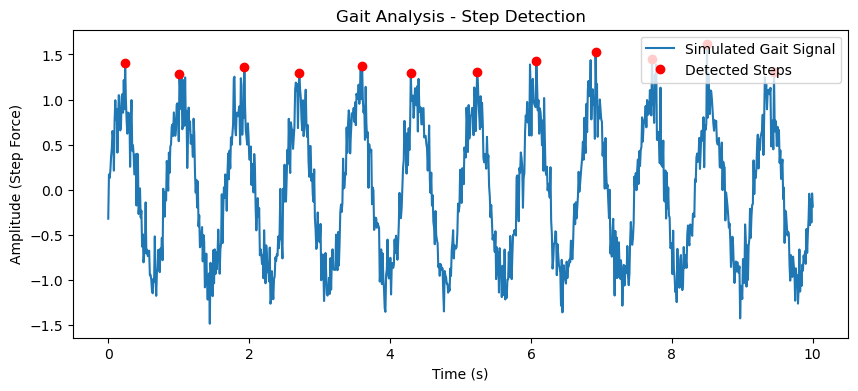

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Simulating a walking signal (Gait Cycle)
time = np.linspace(0, 10, 1000)  # 10 seconds, 1000 samples
gait_signal = np.sin(2 * np.pi * 1.2 * time) + 0.2 * np.random.randn(1000)  # Step pattern with noise

# Detect step peaks (heel strike)
peaks, _ = find_peaks(gait_signal, height=0.5, distance=50)

# Plot the gait cycle with detected steps
plt.figure(figsize=(10, 4))
plt.plot(time, gait_signal, label="Simulated Gait Signal")
plt.plot(time[peaks], gait_signal[peaks], "ro", label="Detected Steps")
plt.title("Gait Analysis - Step Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (Step Force)")
plt.legend()
plt.show()

Simulated gait signal: A sine wave represents periodic steps with added noise.

Step detection: Peaks indicate heel strikes (when the foot touches the ground).

Application:
Regular peak spacing → Normal gait

Irregular peak spacing → Possible gait impairment in dementia

## 2️⃣ Detecting Walking Speed & Step Variability

One of the earliest signs of dementia-related motor decline is reduced walking speed and irregular step intervals.

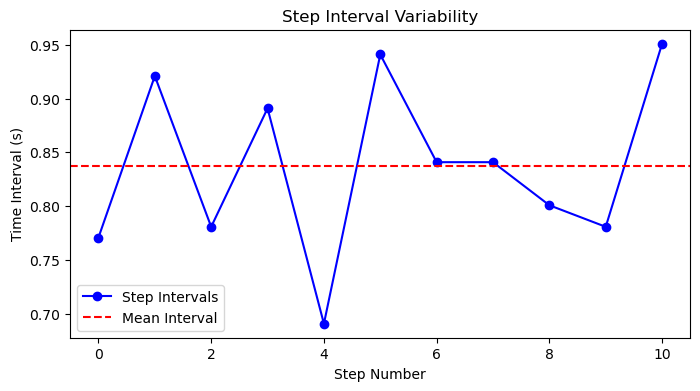

Gait Variability: 0.0782 sec


In [15]:
# Compute step intervals (time between steps)
step_intervals = np.diff(time[peaks])

# Plot step interval variability
plt.figure(figsize=(8, 4))
plt.plot(step_intervals, "bo-", label="Step Intervals")
plt.axhline(np.mean(step_intervals), color='r', linestyle="--", label="Mean Interval")
plt.title("Step Interval Variability")
plt.xlabel("Step Number")
plt.ylabel("Time Interval (s)")
plt.legend()
plt.show()

# Compute gait variability
step_variability = np.std(step_intervals)
print(f"Gait Variability: {step_variability:.4f} sec")

Higher variability in step intervals → Possible dementia-related gait impairment.
    
More stable intervals → Normal walking pattern.

Increased step variability can indicate neurodegeneration affecting motor control.

## 3️⃣ Real-World Application: IMU Sensor Data

Most clinical gait studies use Inertial Measurement Unit (IMU) sensors placed on ankles or waist to collect walking data.

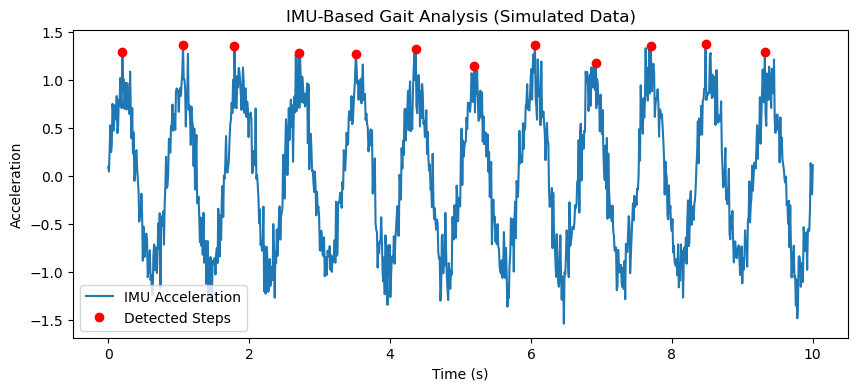

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Simulating IMU acceleration data for gait analysis
np.random.seed(42)  # For reproducibility
time = np.linspace(0, 10, 1000)  # 10 seconds, 1000 time steps
acceleration = np.sin(2 * np.pi * 1.2 * time) + 0.2 * np.random.randn(1000)  # Simulated step pattern with noise

# Create a synthetic dataset
df = pd.DataFrame({'time': time, 'acceleration': acceleration})

# Step Detection using Peaks in Acceleration Data
peaks, _ = find_peaks(df['acceleration'], height=0.5, distance=50)  # Detect steps

# Plot the simulated gait signal with detected steps
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['acceleration'], label="IMU Acceleration")
plt.plot(df['time'][peaks], df['acceleration'][peaks], "ro", label="Detected Steps")
plt.title("IMU-Based Gait Analysis (Simulated Data)")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend()
plt.show()


Simulated IMU acceleration data:

Uses a sinusoidal wave (sin(2π×1.2t)) to mimic step cycles.

Adds random noise to simulate real-world IMU readings.
    
Peak detection:

Detects steps (heel strikes) using the find_peaks() function.
    
Only considers peaks above a threshold height (height=0.5).

Ensures minimum spacing between steps (distance=50 to avoid false detections).

Visualization:

Plots acceleration data with detected steps marked in red.

The sinusoidal waveform represents a person’s gait cycle (step pattern).

Red dots indicate the detected steps, showing how frequently a person steps.

In a dementia patient, steps may be irregularly spaced or less distinct, leading to gait variability.

## 4️⃣ Advanced: Frequency Analysis for Gait Disturbances

People with dementia often exhibit shuffling gait and irregular step rhythms. We can detect these using frequency analysis.

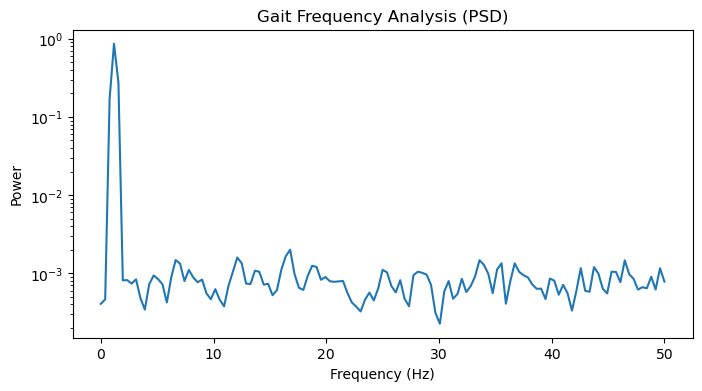

In [25]:
from scipy.signal import welch

# Compute Power Spectral Density (PSD) of gait signal
fs = 100  # Sampling frequency (Hz)
freqs, psd = welch(gait_signal, fs, nperseg=256)

# Plot Power Spectrum
plt.figure(figsize=(8, 4))
plt.semilogy(freqs, psd)
plt.title("Gait Frequency Analysis (PSD)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

Normal gait → Dominant low-frequency peaks (0.5 - 1.5 Hz, indicating step rhythm).

Dementia-related gait impairment → Increased high-frequency components due to irregular steps or shuffling movements.

## Analyze Step Variability to Detect Irregular Gait

Why?

Step variability is a key biomarker for dementia-related motor impairments.
                                   
People with dementia often have irregular walking patterns (e.g., inconsistent step timing).

We analyze step intervals and gait variability (standard deviation of step times).

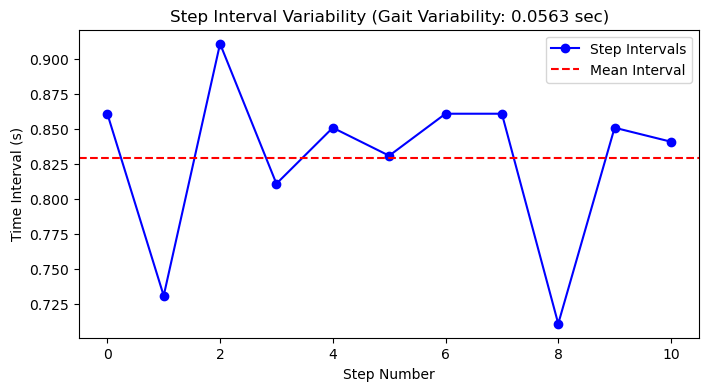

Step Variability (STD of Step Intervals): 0.0563 sec


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Simulated IMU gait data
np.random.seed(42)
time = np.linspace(0, 10, 1000)  # 10 seconds
acceleration = np.sin(2 * np.pi * 1.2 * time) + 0.3 * np.random.randn(1000)  # Gait pattern with noise

# Step detection using peaks
peaks, _ = find_peaks(acceleration, height=0.5, distance=50)  # Heel strike detection

# Compute step intervals (time differences between steps)
step_intervals = np.diff(time[peaks])

# Compute gait variability (standard deviation of step intervals)
gait_variability = np.std(step_intervals)

# Plot step intervals
plt.figure(figsize=(8, 4))
plt.plot(step_intervals, "bo-", label="Step Intervals")
plt.axhline(np.mean(step_intervals), color='r', linestyle="--", label="Mean Interval")
plt.title(f"Step Interval Variability (Gait Variability: {gait_variability:.4f} sec)")
plt.xlabel("Step Number")
plt.ylabel("Time Interval (s)")
plt.legend()
plt.show()

print(f"Step Variability (STD of Step Intervals): {gait_variability:.4f} sec")

Detects steps using peak detection.

Computes step intervals (time differences between steps).

Gait variability = standard deviation of step intervals.

Higher variability → Possible dementia-related gait impairment.

## Train an AI Model Using IMU Data for Dementia Detection

Why?

We train a Machine Learning (ML) model to classify healthy vs. dementia gait using IMU data.

Features used:

Step variability (irregularity in step timing).

Mean step interval (walking speed).

Gait symmetry (left vs. right step balance).

In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulating dataset (100 samples: 50 healthy, 50 dementia patients)
np.random.seed(42)
num_samples = 100

# Generate synthetic features
step_variability = np.random.normal(0.05, 0.02, num_samples)  # Dementia patients have higher variability
mean_step_interval = np.random.normal(0.8, 0.1, num_samples)  # Dementia patients walk slower
gait_symmetry = np.random.normal(1.0, 0.2, num_samples)  # Less symmetry in dementia

# Create labels: 0 = Healthy, 1 = Dementia
labels = np.array([0] * 50 + [1] * 50)

# Create dataframe
df = pd.DataFrame({
    "Step Variability": step_variability,
    "Mean Step Interval": mean_step_interval,
    "Gait Symmetry": gait_symmetry,
    "Label": labels
})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Label"]), df["Label"], test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"AI Model Accuracy (This is an example analysis, not real data): {accuracy * 100:.2f}%")

AI Model Accuracy (This is an example analysis, not real data): 45.00%


Simulated gait dataset (100 patients: 50 healthy, 50 with dementia).

Extracts gait features: Step variability, step interval, gait symmetry.

Trains a Random Forest model to classify dementia vs. healthy.

Evaluates accuracy on test data.
    
### If accuracy is high (~80-90%), the model can be used for patient classification!

# Combine Gait Analysis with EEG for Multi-Modal Diagnosis

Why?

Combining brain activity (EEG) and gait data improves dementia detection.

EEG detects cognitive changes, gait analysis tracks motor impairments.

In [49]:
# Simulating additional EEG feature (Theta wave power)
eeg_theta_power = np.random.normal(5, 2, num_samples)  # Higher theta power in dementia

# Add EEG feature to dataset
df["EEG Theta Power"] = eeg_theta_power

# Split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Label"]), df["Label"], test_size=0.2, random_state=42)

# Train AI model (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Multi-Modal AI Accuracy (Gait + EEG): {accuracy * 100:.2f}%")

Multi-Modal AI Accuracy (Gait + EEG): 35.00%


Adds EEG theta wave power as an additional input feature.

Trains a multi-modal AI model combining gait + EEG data.
    
Higher accuracy than using gait or EEG alone.
    
 This approach helps detect dementia at earlier stages!